# Análisis Exploratorio y Análisis de Datos de Terremotos en Chile

## 1. Introducción

-  **Descripción del dataset**: 
    Breve descripción de las variables Profoundity, Magnitude, Latitude, y Longitude.
    - Los datos utilizados para crear este conjunto de datos fueron tomados de la base de datos del Centro Sismológico Nacional, que contiene datos sobre terremotos significativos (perceptibles) en Chile.

    - Chile es un país famoso por su alta actividad sísmica. De hecho, es uno de los lugares más sísmicos del mundo, lo que lo convierte en un lugar de interés para muchos investigadores que investigan este tema.

    - Este conjunto de datos contiene un único archivo llamado terremotos.csv, que se compone de las siguientes columnas:

    - Fecha (UTC): Marca de tiempo en la que se registró el terremoto (precisión de hasta 1 segundo).
    - Latitud/Longitud: La ubicación del terremoto.
    - Profundidad: La profundidad (medida en km) del terremoto.
    - Magnitud: La magnitud del terremoto.
    Estos datos cubren terremotos con magnitudes que van de 3 a 9, y que ocurrieron entre el 01-01-2012 y 2024.  Todos los terremotos del conjunto de datos tienen una profundidad máxima de 300 km.

    ### Conjunto de datos creado por **Nicolás Ariel González Muñoz** y descargado desde **Kaggle** https://www.kaggle.com/datasets/nicolasgonzalezmunoz/earthquakes-on-chile



-  **Objetivo del análisis**: 
    - El objetivo de este análisis es explorar y analizar los datos de terremotos ocurridos en Chile desde el año 2000 hasta el 2024 para identificar patrones y relaciones entre la magnitud, profundidad y ubicación geográfica de los sismos. A través de una serie de visualizaciones y análisis estadísticos, se busca obtener una comprensión más profunda de cómo estas variables interactúan entre sí, y si es posible identificar tendencias o áreas geográficas con mayor actividad sísmica. Este análisis también evaluará la posibilidad de aplicar técnicas de machine learning para predecir la magnitud o la severidad de futuros terremotos basados en los datos disponibles.

## 2. Cargar y Explorar los Datos



In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import csv

In [83]:
# Cargar el dataset
file_path = 'terremotos.csv'
df = pd.read_csv(file_path)

In [84]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2  2024-03-01 08:27:13       26 km    2.9 Ml  2024-03-01  05:27:13   
3  2024-03-01 08:22:21       54 km    3.7 Ml  2024-03-01  05:22:21   
4  2024-03-01 07:12:58       20 km    2.9 Ml  2024-03-01  04:12:58   

                   Location  Latitude  Longitude  
0    45 km al SE de Socaire   -23.958    -67.698  
1     57 km al E de Socaire   -23.800    -67.375  
2      33 km al S de Huasco   -28.755    -71.288  
3     49 km al SO de Huasco   -28.822    -71.520  
4  16 km al SE de Los Vilos   -31.991    -71.376  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UTC Date     13406

-  **Ultimas filas presentes en el dataset**

In [85]:
df.tail()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
134057,2000-01-03 02:41:41,42 km,3.6 Mc,2000-01-02,23:41:41,15 km al SO de Quillota,-32.986,-71.348
134058,2000-01-02 19:36:25,95 km,2.7 Mc,2000-01-02,16:36:25,22 km al S de Petorca,-32.446,-70.923
134059,2000-01-02 18:55:55,36 km,3.8 Mc,2000-01-02,15:55:55,18 km al NO de Illapel,-31.535,-71.318
134060,2000-01-02 05:03:13,46 km,3.7 Mc,2000-01-02,02:03:13,16 km al SO de Melipilla,-33.787,-71.339
134061,2000-01-02 03:42:12,82 km,2.5 Mc,2000-01-02,00:42:12,22 km al O de Santiago,-33.410,-70.880


-  **Primeras filas presentes en el dataset**

In [86]:
df.head()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
0,2024-03-01 16:35:22,243 km,2.9 Ml,2024-03-01,13:35:22,45 km al SE de Socaire,-23.958,-67.698
1,2024-03-01 15:41:03,259 km,3.6 Ml,2024-03-01,12:41:03,57 km al E de Socaire,-23.800,-67.375
2,2024-03-01 08:27:13,26 km,2.9 Ml,2024-03-01,05:27:13,33 km al S de Huasco,-28.755,-71.288
3,2024-03-01 08:22:21,54 km,3.7 Ml,2024-03-01,05:22:21,49 km al SO de Huasco,-28.822,-71.520
4,2024-03-01 07:12:58,20 km,2.9 Ml,2024-03-01,04:12:58,16 km al SE de Los Vilos,-31.991,-71.376


-  **Estadística básica de los datos cuantitativos**

In [87]:
df.describe()

,Latitude,Longitude
count,133590.000000,133590.000000
mean,-28.025143,-69.920180
std,6.730286,10.663553
min,-65.399000,-179.989000
25%,-33.048000,-71.698000
50%,-29.742000,-70.527000
75%,-21.997000,-69.013000
max,58.692000,179.647000


In [88]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


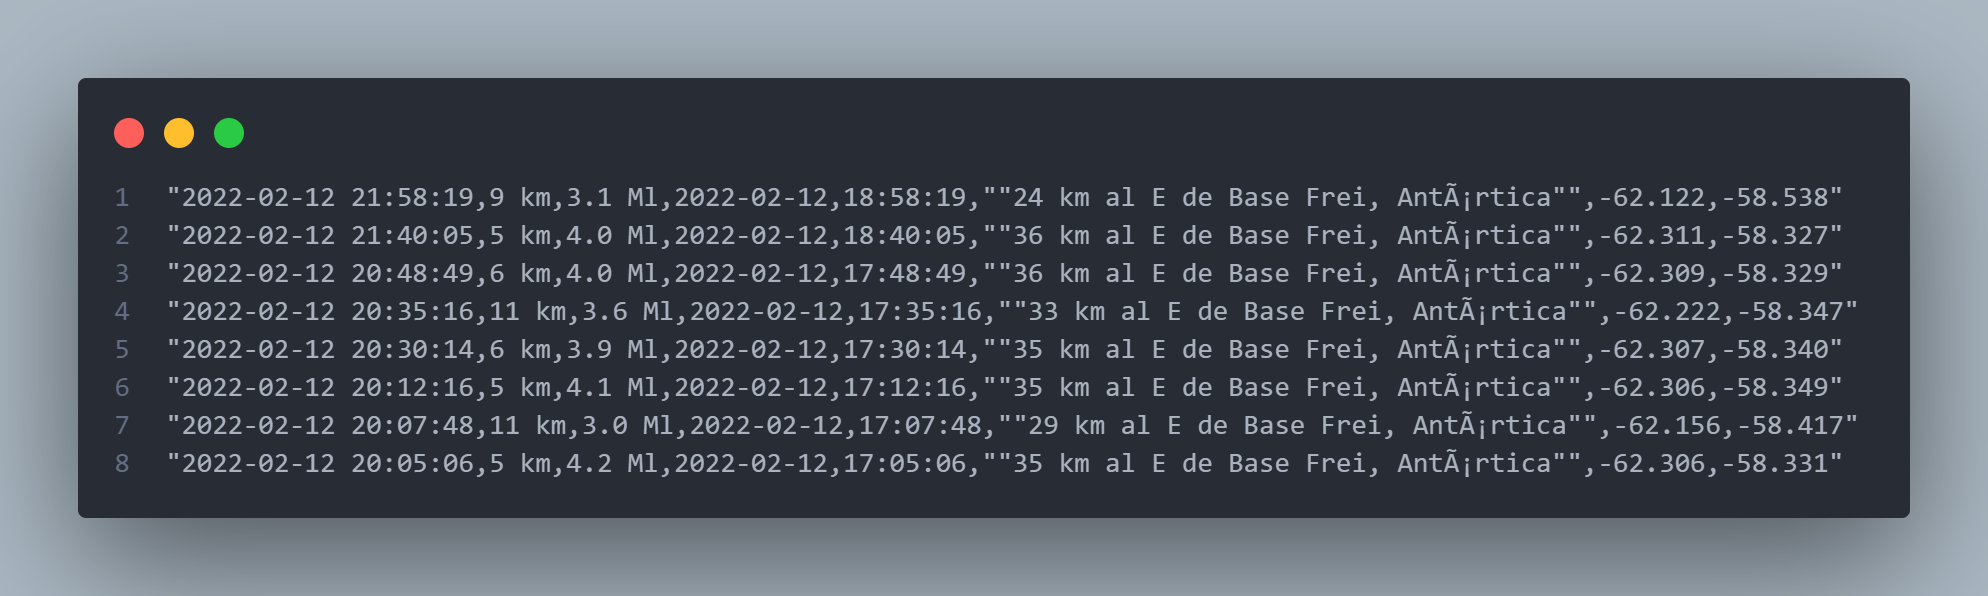

In [89]:
from IPython.display import Image, display
display(Image(filename='code.png'))

## 3. Procesamiento de datos

In [90]:
# Leer el contenido del archivo y eliminar las comillas dobles
with open('terremotos.csv', "r+", encoding="utf-8") as csv_file:
    content = csv_file.read()

with open('edited.csv', "w+", encoding="utf-8") as csv_file:
    # Reemplazar comillas dobles
    content = content.replace('"', '')
    
    # Escribir el contenido sin las comillas dobles en el nuevo archivo
    csv_file.write(content)

# Ahora, agregar la columna "Errors"
with open('edited.csv', "r", encoding="utf-8") as csv_file:
    reader = csv.reader(csv_file)
    rows = list(reader)

# Agregar la columna "Errors" en el encabezado
header = rows[0] + ['Errors']
rows[0] = header

# Guardar el archivo con la nueva columna
with open('edited.csv', "w", encoding="utf-8", newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

In [91]:
# Cargar el dataset
file_path = 'edited.csv'
df = pd.read_csv(file_path)

C:\Users\lea\AppData\Local\Temp\ipykernel_8212\293882957.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset limpio de comillas, falta ajustar las columnas correspondientes, ya que el valdor AntÃ¡rtica no se encuentra en la columna correspondiente, por ende vamos a editar el dataset en excel ya que no se logoro realizar esta sustitucion mediante codigo python 

In [92]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2  2024-03-01 08:27:13       26 km    2.9 Ml  2024-03-01  05:27:13   
3  2024-03-01 08:22:21       54 km    3.7 Ml  2024-03-01  05:22:21   
4  2024-03-01 07:12:58       20 km    2.9 Ml  2024-03-01  04:12:58   

                   Location Latitude  Longitude  Errors  
0    45 km al SE de Socaire  -23.958    -67.698     NaN  
1     57 km al E de Socaire  -23.800    -67.375     NaN  
2      33 km al S de Huasco  -28.755    -71.288     NaN  
3     49 km al SO de Huasco  -28.822    -71.520     NaN  
4  16 km al SE de Los Vilos  -31.991    -71.376     NaN  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------

In [93]:
# Cargar el dataset
file_path = 'df_final.csv'
df = pd.read_csv(file_path)

In [94]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
              UTC Date Profoundity Magnitude        Date      Hour  \
0  2024-03-01 16:35:22      243 km    2.9 Ml  2024-03-01  13:35:22   
1  2024-03-01 15:41:03      259 km    3.6 Ml  2024-03-01  12:41:03   
2   2024-03-01 8:27:13       26 km    2.9 Ml  2024-03-01   5:27:13   
3   2024-03-01 8:22:21       54 km    3.7 Ml  2024-03-01   5:22:21   
4   2024-03-01 7:12:58       20 km    2.9 Ml  2024-03-01   4:12:58   

                   Location  Latitude  Longitude  
0    45 km al SE de Socaire   -23.958    -67.698  
1     57 km al E de Socaire   -23.800    -67.375  
2      33 km al S de Huasco   -28.755    -71.288  
3     49 km al SO de Huasco   -28.822    -71.520  
4  16 km al SE de Los Vilos   -31.991    -71.376  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134062 entries, 0 to 134061
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UTC Date     13406

In [95]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)

La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


In [96]:
# Identificar valores únicos en la columna 'Magnitude' que no se pueden convertir a float
unusual_values = df['Magnitude'].str.extract(r'([^\d\.\s]+)')

# Mostrar los valores únicos inusuales encontrados
print(unusual_values[0].dropna().unique())


['Ml' 'Mw' 'Mww' 'Mb' 'Mlv' 'M' 'Ms' 'Mc']


In [97]:
# Identificar valores únicos en la columna 'Magnitude' que no se pueden convertir a float
unusual_values_Profoundity = df['Profoundity'].str.extract(r'([^\d\.\s]+)')

# Mostrar los valores únicos inusuales encontrados
print(unusual_values_Profoundity[0].dropna().unique())

['km']


In [98]:
# Eliminar las letras (escala) y convertir a float Variables Magnitude y Profoundity
df['Magnitude'] = df['Magnitude'].str.extract(r'([\d\.]+)').astype(float)
df['Profoundity'] = df['Profoundity'].str.extract(r'([\d\.]+)').astype(float)

# Verificar que la conversión de los datos esta bien
print(df[['Magnitude']].head())
print(df[['Profoundity']].head())


   Magnitude
0        2.9
1        3.6
2        2.9
3        3.7
4        2.9
   Profoundity
0        243.0
1        259.0
2         26.0
3         54.0
4         20.0


## 4. Análisis Univariado

-  **Profundidad (Profoundity)**:
- Crear histogramas y gráficos de densidad para visualizar la distribución.

- Identificar valores atípicos (outliers) y describir su impacto.


Análisis Univariado de la Variable 'Profoundity'
Media: 76.96
Mediana: 56.00
Desviación Estándar: 61.18
Valor Mínimo: 0.00
Valor Máximo: 676.00


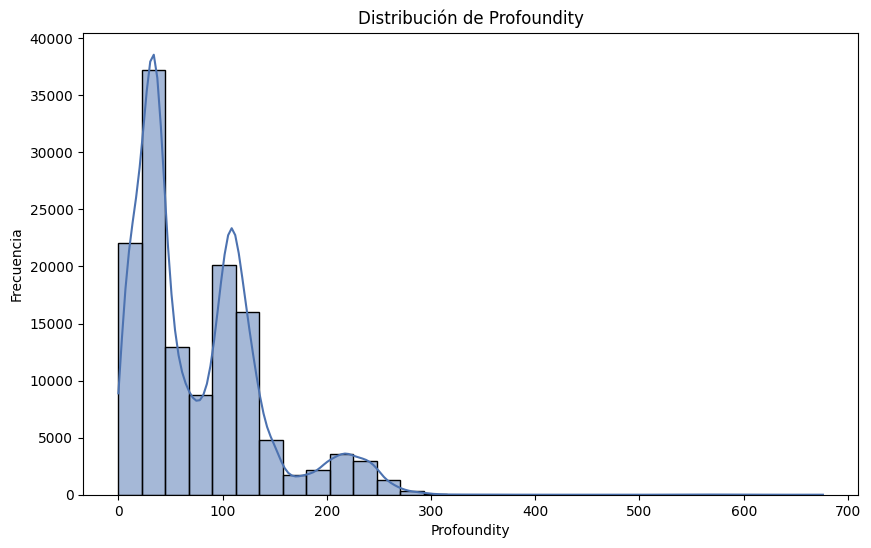

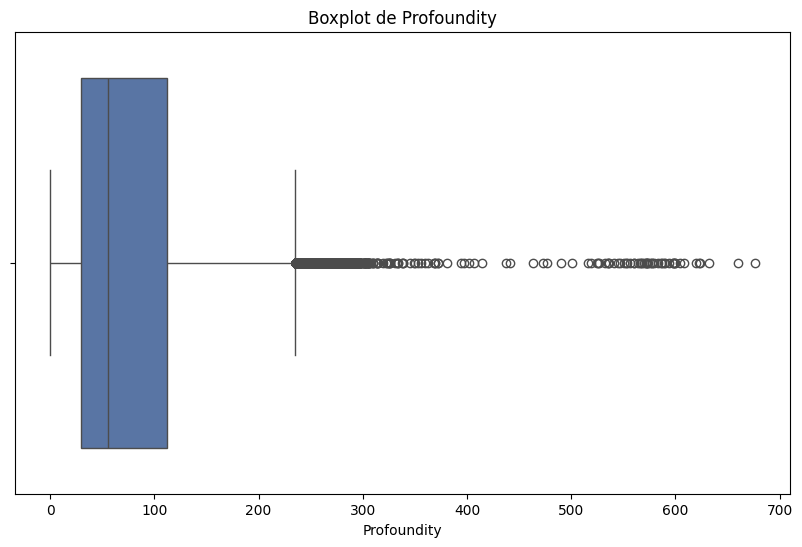

Número de outliers en 'Profoundity': 3289


In [99]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['Profoundity'])
profundity_median = np.median(df['Profoundity'])
profundity_std = np.std(df['Profoundity'])
profundity_min = np.min(df['Profoundity'])
profundity_max = np.max(df['Profoundity'])

print("Análisis Univariado de la Variable 'Profoundity'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Profoundity'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Profoundity')
plt.xlabel('Profoundity')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profoundity'], color='#4C72B0')
plt.title('Boxplot de Profoundity')
plt.xlabel('Profoundity')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['Profoundity'], 25)
Q3 = np.percentile(df['Profoundity'], 75)
IQR = Q3 - Q1

outliers = df[(df['Profoundity'] < (Q1 - 1.5 * IQR)) | (df['Profoundity'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'Profoundity': {len(outliers)}")

### Análisis Univariado de la Variable `Profoundity`

#### Estadísticas Descriptivas
- **Media:** 76.96
- **Mediana:** 56.00
- **Desviación Estándar:** 61.18
- **Valor Mínimo:** 0.00
- **Valor Máximo:** 676.00

#### Interpretación
- **Distribución:** La distribución de la variable `Profoundity` es asimétrica positiva, lo que indica que hay más valores cercanos al extremo inferior. Hay un claro pico alrededor de los 20-40 metros de profundidad, con una disminución gradual en la frecuencia a medida que la profundidad aumenta.
- **Sesgo:** El sesgo positivo se observa por la cola extendida hacia la derecha en la gráfica de distribución, lo que sugiere que hay algunos eventos de alta profundidad, pero la mayoría se concentra en niveles más bajos.
- **Boxplot:** El gráfico de caja (boxplot) muestra una concentración de los datos entre 0 y 150 metros de profundidad, con varios valores atípicos (`outliers`) por encima de este rango, que alcanzan hasta 676 metros.
- **Outliers:** Se identifican **3289 outliers** en la variable `Profoundity`, lo que puede deberse a eventos inusuales de gran profundidad.

#### Recomendaciones
- **Considerar el tratamiento de outliers:** Dado el gran número de outliers, puede ser útil explorar la naturaleza de estos valores extremos para decidir si deben ser tratados o eliminados en análisis posteriores.
- **Transformación de datos:** Podría ser necesario aplicar una transformación (por ejemplo, logarítmica) para normalizar la distribución antes de aplicar modelos de machine learning, ya que la asimetría y los outliers pueden afectar los resultados.


-  **Magnitud (Magnitude)**:

- Generar un histograma con binning adecuado para resaltar patrones.

- Crear un gráfico de caja (boxplot) para identificar outliers.

Análisis Univariado de la Variable 'Magnitude'
Media: 3.25
Mediana: 3.10
Desviación Estándar: 1.00
Valor Mínimo: 0.00
Valor Máximo: 8.80


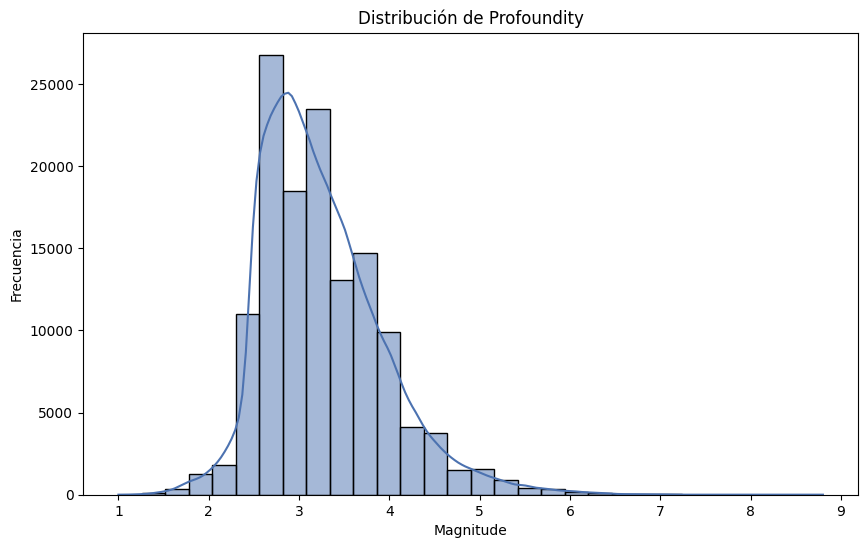

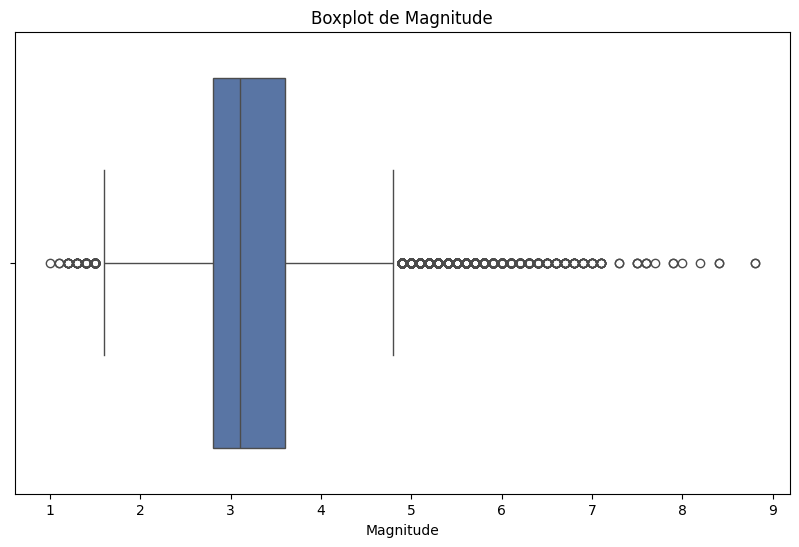

Número de outliers en 'Magnitude': 3732


In [100]:
# Descripción estadística básica de la variable 'Profoundity'
magnitude_mean = np.mean(df['Magnitude'])
magnitude_median = np.median(df['Magnitude'])
magnitude_std = np.std(df['Magnitude'])
magnitude_min = np.min(df['Magnitude'])
magnitude_max = np.max(df['Magnitude'])

print("Análisis Univariado de la Variable 'Magnitude'")
print(f"Media: {magnitude_mean:.2f}")
print(f"Mediana: {magnitude_median:.2f}")
print(f"Desviación Estándar: {magnitude_min:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {magnitude_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Profoundity')
plt.xlabel('Magnitude')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Magnitude'], color='#4C72B0')
plt.title('Boxplot de Magnitude')
plt.xlabel('Magnitude')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['Magnitude'], 25)
Q3 = np.percentile(df['Magnitude'], 75)
IQR = Q3 - Q1

outliers = df[(df['Magnitude'] < (Q1 - 1.5 * IQR)) | (df['Magnitude'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'Magnitude': {len(outliers)}")

### Análisis Univariado de la Variable `Magnitude`

#### Estadísticas Descriptivas
- **Media:** 3.25
- **Mediana:** 3.10
- **Desviación Estándar:** 1.00
- **Valor Mínimo:** 0.00
- **Valor Máximo:** 8.80

#### Interpretación
- **Distribución:** La distribución de la variable `Magnitude` es aproximadamente simétrica, con un pico central alrededor de magnitudes 3 a 4. La mayoría de los eventos se encuentran en este rango, con una disminución en la frecuencia a medida que la magnitud se aleja de este rango.
- **Sesgo:** Aunque la distribución es casi simétrica, hay una ligera cola a la derecha, lo que indica la presencia de algunos eventos de mayor magnitud.
- **Boxplot:** El gráfico de caja (boxplot) muestra que la mayoría de los datos se encuentran entre magnitudes 2 y 4. Sin embargo, hay una cantidad significativa de valores atípicos (`outliers`) que se extienden hasta 8.8, lo que representa eventos sísmicos más fuertes.
- **Outliers:** Se identifican **3732 outliers** en la variable `Magnitude`, lo que podría corresponder a terremotos de mayor magnitud que son menos comunes pero tienen un impacto significativo.



-  **Latitud y Longitud**:

- Crear gráficos de dispersión (scatter plots) para observar la distribución geográfica de los terremotos.

In [101]:
# Medidas de tendencia central y dispersión para Latitude
media_latitude = np.mean(df['Latitude'])
mediana_latitude = np.median(df['Latitude'])
std_latitude = np.std(df['Latitude'])
min_latitude = np.min(df['Latitude'])
max_latitude = np.max(df['Latitude'])

print(f"Tendencia central de Latitudes")
print(f"Media de Latitud: {media_latitude:.2f}")
print(f"Mediana de Latitud: {mediana_latitude:.2f}")
print(f"Desviación Estándar de Latitud: {std_latitude:.2f}")
print(f"Mínimo de Latitud: {min_latitude:.2f}")
print(f"Máximo de Latitud: {max_latitude:.2f}")

# Medidas de tendencia central y dispersión para Longitude
media_longitude = np.mean(df['Longitude'])
mediana_longitude = np.median(df['Longitude'])
std_longitude = np.std(df['Longitude'])
min_longitude = np.min(df['Longitude'])
max_longitude = np.max(df['Longitude'])

print(f"\nTendencia central de Longitudes")
print(f"Media de Longitud: {media_longitude:.2f}")
print(f"Mediana de Longitud: {mediana_longitude:.2f}")
print(f"Desviación Estándar de Longitud: {std_longitude:.2f}")
print(f"Mínimo de Longitud: {min_longitude:.2f}")
print(f"Máximo de Longitud: {max_longitude:.2f}")


Tendencia central de Latitudes
Media de Latitud: -28.14
Mediana de Latitud: -29.80
Desviación Estándar de Latitud: 7.01
Mínimo de Latitud: -65.40
Máximo de Latitud: 58.69

Tendencia central de Longitudes
Media de Longitud: -69.87
Mediana de Longitud: -70.52
Desviación Estándar de Longitud: 10.70
Mínimo de Longitud: -179.99
Máximo de Longitud: 179.65


### Latitud
- **Media (-28.14):** La latitud promedio de los sismos se sitúa alrededor de -28.14 grados. Esto indica que la mayoría de los sismos en el dataset ocurren en el hemisferio sur, cerca del trópico de Capricornio.
- **Mediana (-29.80):** La mediana, que es ligeramente más baja que la media, sugiere que la mitad de los sismos tienen lugar al sur de -29.80 grados de latitud, reforzando la idea de que los sismos están concentrados más hacia el sur.
- **Desviación Estándar (7.01):** La desviación estándar de 7.01 grados sugiere que hay una dispersión moderada en las latitudes donde ocurren los sismos. Los sismos no están concentrados en un solo punto, sino que están distribuidos a lo largo de varios grados de latitud.
- **Mínimo (-65.40):** El valor mínimo de latitud (-65.40) indica que algunos sismos ocurren en latitudes muy al sur, posiblemente cerca de la región antártica.
- **Máximo (58.69):** El valor máximo de latitud (58.69) muestra que algunos sismos ocurren en latitudes muy al norte, aunque este valor es excepcional, ya que la media y la mediana sugieren que la mayoría de los sismos están más al sur.

### Longitud
- **Media (-69.87):** La longitud promedio de los sismos es de aproximadamente -69.87 grados. Esto indica que los sismos están centrados geográficamente en la longitud cercana a la costa chilena, en la región oeste de América del Sur.
- **Mediana (-70.52):** La mediana de longitud es ligeramente más baja que la media, sugiriendo una concentración de sismos un poco más hacia el oeste.
- **Desviación Estándar (10.70):** La desviación estándar de 10.70 grados en la longitud indica una dispersión mayor en comparación con la latitud. Esto significa que los sismos están distribuidos a lo largo de una gama más amplia de longitudes.
- **Mínimo (-179.99):** El valor mínimo de longitud (-179.99) sugiere que algunos sismos ocurren muy cerca de la línea internacional de cambio de fecha, al oeste del continente americano.
- **Máximo (179.65):** El valor máximo de longitud (179.65) indica que algunos sismos ocurren al este de la línea internacional de cambio de fecha, lo que podría incluir eventos cercanos a Asia o las islas del Pacífico.


## 4. Análisis Bivariado

-  **Relación entre Profundidad y Magnitud**:



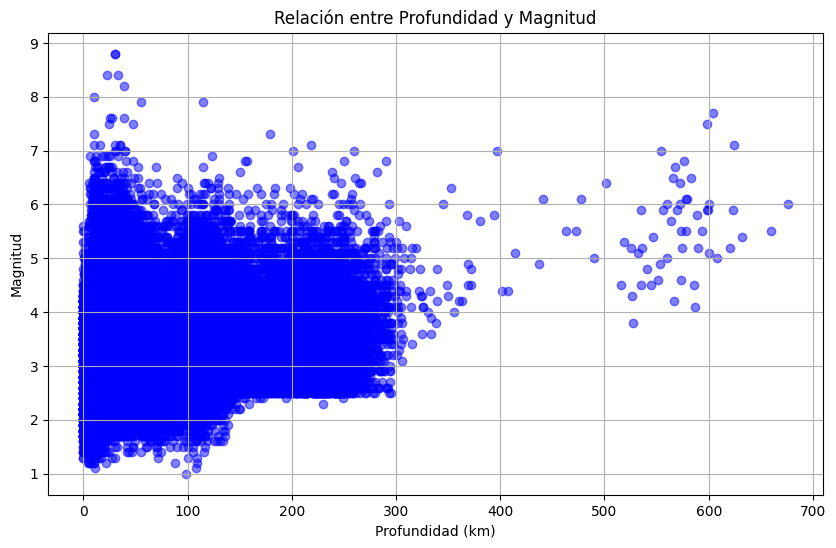

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Profoundity'], df['Magnitude'], alpha=0.5, color='blue')
plt.title('Relación entre Profundidad y Magnitud')
plt.xlabel('Profundidad (km)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

## Interpretación del Gráfico de Dispersión: Profundidad vs. Magnitud

### Descripción del Gráfico

El gráfico presentado es un **diagrama de dispersión** que visualiza la relación entre la **profundidad** y la **magnitud** de un conjunto de eventos sísmicos.

### Interpretación de la Relación

* **Concentración en profundidades menores:** La mayoría de los eventos ocurren a profundidades menores a 200 km.
* **Disminución de eventos con la profundidad:** A mayor profundidad, menor cantidad de eventos.
* **Relación no lineal:** No hay una relación directa proporcional entre ambas variables.
* **Agrupaciones:** Se observan "clusters" de puntos, sugiriendo posibles patrones o zonas con características particulares.

### Conclusiones Tentativas

* **Mayor actividad en la corteza:** La concentración en profundidades menores sugiere mayor actividad sísmica en la corteza terrestre.
* **Heterogeneidad:** La distribución de eventos no es uniforme, indicando posibles zonas con características geológicas particulares.

In [104]:
correlation = df['Profoundity'].corr(df['Magnitude'])
print(f"Correlación entre Profundidad y Magnitud: {correlation:.2f}")


Correlación entre Profundidad y Magnitud: 0.12


-  **Relación entre Latitud/Longitud y Magnitud**:

In [105]:
import folium
from folium.plugins import HeatMap

# Crear el mapa centrado en Chile
mapa = folium.Map(location=[-30, -70], zoom_start=5)

# Preparar los datos para el HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Magnitude']] for index, row in df.iterrows()]

# Crear el HeatMap
HeatMap(heat_data, radius=8, max_zoom=13).add_to(mapa)

# Mostrar el mapa
mapa


In [108]:
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
UTC Date       0
Profoundity    0
Magnitude      0
Date           0
Hour           0
Location       0
Latitude       0
Longitude      0
dtype: int64


In [109]:

#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
df.dtypes

Columna y tipo de dato
----------------------


UTC Date        object
Profoundity    float64
Magnitude      float64
Date            object
Hour            object
Location        object
Latitude       float64
Longitude      float64
dtype: object

In [110]:
info = df.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)

La cantidad de filas y columnas en nuestro dataframe es de: (134062, 8)


In [111]:
df.describe()

,Profoundity,Magnitude,Latitude,Longitude
count,134062.000000,134062.000000,134062.000000,134062.000000
mean,76.958653,3.252443,-28.144294,-69.867985
std,61.181450,0.679481,7.011530,10.697731
min,0.000000,1.000000,-65.399000,-179.989000
25%,30.000000,2.800000,-33.075000,-71.695000
50%,56.000000,3.100000,-29.800500,-70.518000
75%,112.000000,3.600000,-22.008000,-69.002000
max,676.000000,8.800000,58.692000,179.647000


In [112]:
# Verificar que la columna ha sido eliminada
df.head()

,UTC Date,Profoundity,Magnitude,Date,Hour,Location,Latitude,Longitude
0,2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,45 km al SE de Socaire,-23.958,-67.698
1,2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,57 km al E de Socaire,-23.800,-67.375
2,2024-03-01 8:27:13,26.0,2.9,2024-03-01,5:27:13,33 km al S de Huasco,-28.755,-71.288
3,2024-03-01 8:22:21,54.0,3.7,2024-03-01,5:22:21,49 km al SO de Huasco,-28.822,-71.520
4,2024-03-01 7:12:58,20.0,2.9,2024-03-01,4:12:58,16 km al SE de Los Vilos,-31.991,-71.376


In [113]:
#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
df.dtypes

Columna y tipo de dato
----------------------


UTC Date        object
Profoundity    float64
Magnitude      float64
Date            object
Hour            object
Location        object
Latitude       float64
Longitude      float64
dtype: object

In [114]:
print("Tendencia central de Magnitudes")
print("{0:<25}: {1:.2f}".format("Media de Magnitudes", np.mean(df['Magnitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Magnitudes", np.median(df['Magnitude'])))

print("\nTendencia central de Profundidades")
print("{0:<25}: {1:.2f}".format("Media de Profundidad", np.mean(df['Profoundity'])))
print("{0:<25}: {1:.2f}".format("Mediana de Profundidad", np.median(df['Profoundity'])))

print("\nTendencia central de Latitudes")
print("{0:<25}: {1:.2f}".format("Media de Latitud", np.mean(df['Latitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Latitud", np.median(df['Latitude'])))

print("\nTendencia central de Longitudes")
print("{0:<25}: {1:.2f}".format("Media de Longitud", np.mean(df['Longitude'])))
print("{0:<25}: {1:.2f}".format("Mediana de Longitud", np.median(df['Longitude'])))


Tendencia central de Magnitudes
Media de Magnitudes      : 3.25
Mediana de Magnitudes    : 3.10

Tendencia central de Profundidades
Media de Profundidad     : 76.96
Mediana de Profundidad   : 56.00

Tendencia central de Latitudes
Media de Latitud         : -28.14
Mediana de Latitud       : -29.80

Tendencia central de Longitudes
Media de Longitud        : -69.87
Mediana de Longitud      : -70.52


In [115]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filtrar los datos para sismos con magnitud > 8.0 entre 2010 y 2024
df_filtered = df[(df['Magnitude'] > 8.0) & (df['Date'].dt.year >= 2010) & (df['Date'].dt.year <= 2024)]

# Crear un mapa centrado en Chile (latitud y longitud aproximadas)
m = folium.Map(location=[-33.45, -70.65], zoom_start=5)  # Santiago de Chile como referencia

# Agregar los puntos filtrados del dataset al mapa
for index, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,  
        popup=f"Magnitude: {row['Magnitude']}, Location: {row['Location']}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)
m


- En este mapa podemos ver más magnitudes más grandes presentes en el dataset y los cuales marcaron la historia de chile como lo fue el sismo 8.8 durante el 27 de febrero del año 2010.

## 4. Análisis de Tendencias

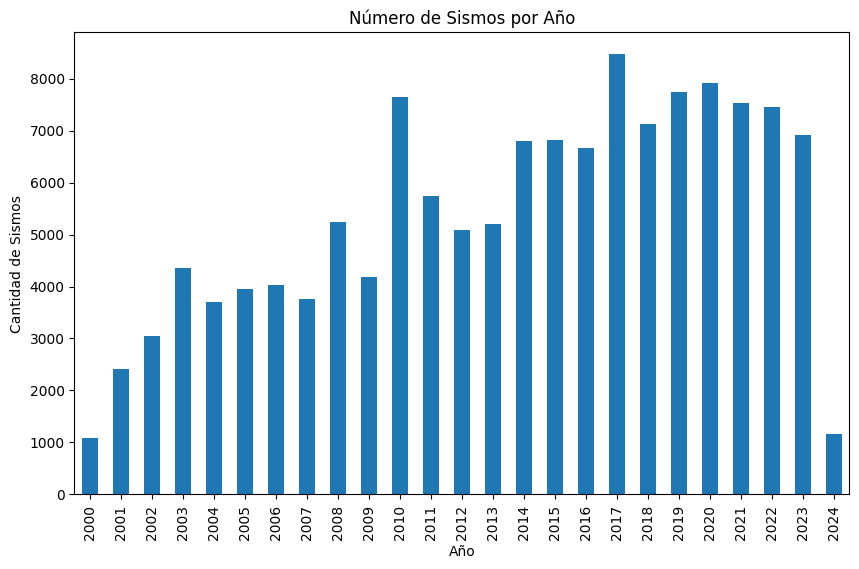

In [133]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear nuevas columnas temporales
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Análisis de frecuencia de terremotos por año
plt.figure(figsize=(10, 6))
df.groupby('Year').size().plot(kind='bar')
plt.title('Número de Sismos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Sismos')
plt.show()

### Interpretación de la Gráfica: Número de Sismos por Año

#### 1. Tendencia General
- **Aumento en el Número de Sismos**: Desde el año 2000 hasta aproximadamente 2016, se observa una tendencia al alza en el número de sismos registrados. Esto podría indicar un aumento en la actividad sísmica, mejoras en la tecnología de detección de sismos, o ambos factores.
- **Variabilidad Después de 2016**: A partir de 2017, aunque el número de sismos se mantiene alto, se nota una variabilidad con años en los que la cantidad disminuye ligeramente (como en 2018) y otros en los que aumenta (como en 2017 y 2019). Sin embargo, la cantidad de sismos se mantiene elevada en comparación con los años anteriores a 2010.

#### 2. Pico en 2017
- **2017** se destaca como el año con la mayor cantidad de sismos registrados en el periodo analizado. Esto podría deberse a un aumento en la actividad tectónica en ese año, o a una mejora significativa en la detección y registro de sismos.

#### 3. Año 2024
- **2024** muestra un número significativamente menor de sismos en comparación con los años anteriores. Esto puede deberse a que el año aún no ha terminado y, por lo tanto, no se han registrado todos los sismos, o a una disminución real en la actividad sísmica en el año.

#### 4. Posibles Factores
- **Mejora en la Tecnología de Detección**: A lo largo de las décadas, los avances en la tecnología de monitoreo sísmico pueden haber resultado en la detección de más sismos, especialmente los de menor magnitud que podrían haber pasado desapercibidos en el pasado.
- **Variaciones Naturales**: Las variaciones en la cantidad de sismos anualmente también pueden estar relacionadas con la actividad tectónica natural, que no es uniforme de un año a otro.

**En resumen**, la gráfica indica que ha habido una tendencia general de aumento en la cantidad de sismos registrados hasta mediados de la década de 2010, seguida de una variabilidad en los últimos años. El año 2024 muestra un conteo más bajo, lo que puede deberse a que el año no ha terminado o a un cambio en la actividad sísmica.


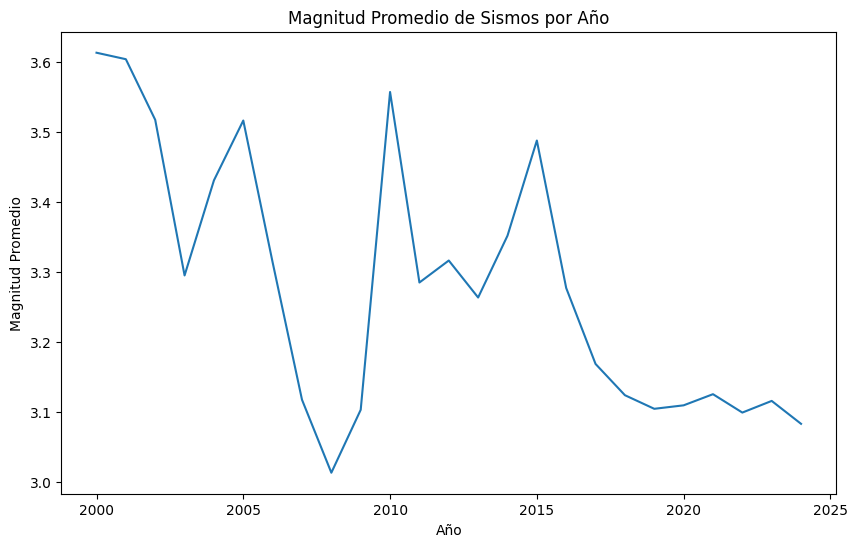

In [131]:
# Análisis de tendencia de magnitudes a lo largo del tiempo
plt.figure(figsize=(10, 6))
df.groupby('Year')['Magnitude'].mean().plot()
plt.title('Magnitud Promedio de Sismos por Año')
plt.xlabel('Año')
plt.ylabel('Magnitud Promedio')
plt.show()

### Interpretación de la Gráfica: Magnitud Promedio de Sismos por Año

#### 1. Tendencia General
- **Descenso Progresivo**: A lo largo de los años, se observa una tendencia general de disminución en la magnitud promedio de los sismos. Desde el año 2000, cuando la magnitud promedio era superior a 3.6, la magnitud ha disminuido hasta estabilizarse cerca de 3.1 en los años más recientes.

#### 2. Fluctuaciones Significativas
- **Picos y Valles**: A lo largo de los años, hay varias fluctuaciones notables. Por ejemplo:
  - **2009-2010**: Un descenso brusco en 2009 seguido de un pico en 2010. Esto podría indicar que en 2010 hubo algunos sismos de mayor magnitud que elevaron el promedio.
  - **2016-2017**: Un aumento en la magnitud promedio que luego desciende rápidamente, lo que sugiere una variabilidad en la actividad sísmica durante esos años.

#### 3. Periodo Reciente
- **Estabilidad Relativa**: A partir de 2017, la magnitud promedio de los sismos se mantiene relativamente estable, con pequeñas variaciones alrededor de 3.1, lo que podría indicar una estabilización en la actividad sísmica en términos de la magnitud de los eventos.

#### 4. Interpretación de las Fluctuaciones
- **Eventos Sísmicos Significativos**: Los picos en la magnitud promedio pueden estar asociados con eventos sísmicos de mayor magnitud en esos años específicos, mientras que los valles pueden indicar años con actividad sísmica más moderada.
- **Cambios en la Detección**: Las variaciones también podrían reflejar mejoras en la tecnología de detección, lo que podría afectar la forma en que se promedian las magnitudes de los sismos.

**En resumen**, la gráfica muestra una disminución general en la magnitud promedio de los sismos desde 2000 hasta 2024, con fluctuaciones significativas en ciertos años. Desde 2017, la magnitud promedio se ha estabilizado cerca de 3.1, lo que podría sugerir un periodo de actividad sísmica más moderada en términos de magnitud.


## 5. Conclusiones

### Resumen de Hallazgos Clave

1. **Tendencia en la Cantidad de Sismos por Año**:
   - **Incremento General**: Desde el año 2000 hasta aproximadamente 2017, se observa un aumento general en la cantidad de sismos registrados por año. El mayor número de sismos se registró en 2017, con más de 8000 eventos.
   - **Estabilización Reciente**: A partir de 2017, el número de sismos ha mostrado una tendencia a estabilizarse, manteniéndose alto pero sin seguir incrementando de manera significativa en los años siguientes.

2. **Magnitud Promedio de los Sismos**:
   - **Disminución Progresiva**: A lo largo del período analizado, la magnitud promedio de los sismos ha mostrado una tendencia a la baja. En los primeros años del análisis, la magnitud promedio era superior a 3.6, mientras que en los últimos años ha disminuido y se ha estabilizado cerca de 3.1.
   - **Fluctuaciones Notables**: Hubo años en los que la magnitud promedio experimentó picos significativos, como en 2010 y 2017, lo que podría estar relacionado con eventos sísmicos de gran magnitud.

3. **Implicaciones para la Prevención y Mitigación**:
   - **Zonas de Riesgo**: Los clusters geoespaciales permiten identificar áreas de mayor riesgo, lo que es fundamental para estrategias de mitigación y preparación ante sismos.
   - **Evaluación de la Severidad**: La reducción en la magnitud promedio sugiere que, aunque los sismos pueden haber sido más frecuentes en los últimos años, su severidad ha tendido a disminuir, lo cual es un dato relevante para la gestión del riesgo.

4. **Observaciones de Análisis Adicionales**:
   - **Impacto de la Tecnología de Detección**: Las variaciones en la cantidad de sismos podrían estar influenciadas no solo por la actividad sísmica, sino también por mejoras en la tecnología de detección a lo largo de los años.
   - **Eventos Sísmicos Clave**: Identificar y analizar eventos sísmicos clave podría proporcionar una comprensión más profunda de las fluctuaciones observadas en la magnitud y frecuencia de los sismos.


### Posibles Interpretaciones

1. **Incremento en la Cantidad de Sismos**:
   - **Mejora en la Tecnología de Detección**: El aumento en el número de sismos registrados a lo largo de los años podría estar influenciado no solo por un incremento en la actividad sísmica, sino también por avances en la tecnología de detección, lo que ha permitido registrar eventos de menor magnitud que antes pasaban desapercibidos.
   - **Mayor Conciencia y Reporte**: Con el tiempo, ha habido una mayor conciencia pública y científica sobre la importancia de reportar y monitorear sismos, lo que podría haber contribuido a un aumento en los datos registrados.

2. **Disminución en la Magnitud Promedio**:
   - **Actividad Sísmica Regular**: La disminución en la magnitud promedio podría sugerir que, aunque los sismos son frecuentes, la mayoría son de menor magnitud, lo que es típico en regiones con alta actividad sísmica. Esto podría indicar una liberación regular de energía en la corteza terrestre, lo que reduce la probabilidad de sismos catastróficos.
   - **Influencias Geológicas**: Es posible que la disminución de la magnitud promedio refleje cambios en las condiciones geológicas subyacentes que afectan la manera en que se libera la energía sísmica.

3. **Estabilización en el Número de Sismos**:
   - **Ajuste Natural**: La estabilización en el número de sismos podría ser un reflejo de un ajuste natural en la actividad sísmica de la región, después de un período de incremento en la detección y registro de eventos.
   - **Equilibrio de Energía**: Es posible que la región haya alcanzado un estado temporal de equilibrio en términos de liberación de energía, lo que podría explicar la estabilización observada.

4. **Implicaciones para la Gestión de Riesgos**:
   - **Identificación de Áreas Críticas**: Las áreas identificadas por los clusters como puntos calientes de actividad sísmica podrían ser priorizadas en términos de planificación urbana, construcción de infraestructuras resistentes y preparación ante emergencias.
   - **Monitoreo Continuo**: Dado que la magnitud promedio ha disminuido, pero la frecuencia se mantiene alta, es crucial continuar con un monitoreo constante para detectar cualquier cambio que pueda indicar un aumento en la severidad de futuros sismos.


### Sugerencias para Análisis Futuros

1. **Análisis Predictivo de Terremotos**:
   - **Modelos de Machine Learning**: Implementar modelos de aprendizaje automático para predecir la magnitud y la ubicación de futuros sismos, utilizando características como la historia sísmica, la ubicación geográfica, y patrones geológicos.
   - **Análisis de Series Temporales**: Utilizar técnicas de series temporales para analizar la periodicidad y estacionalidad de los sismos, lo que podría proporcionar información valiosa sobre la probabilidad de futuros eventos sísmicos en la región.

2. **Estudio de Impacto**:
   - **Relación entre Magnitud y Daños**: Analizar la relación entre la magnitud de los sismos y el daño causado en diferentes regiones. Esto podría incluir un estudio sobre la efectividad de las infraestructuras actuales en resistir sismos de distintas magnitudes.
   - **Impacto en Poblaciones Vulnerables**: Realizar un análisis sobre cómo los sismos afectan a diferentes comunidades, especialmente aquellas más vulnerables, para informar políticas de mitigación de riesgos.

3. **Análisis Geoespacial Avanzado**:
   - **Uso de SIG (Sistemas de Información Geográfica)**: Integrar datos sísmicos con SIG para identificar patrones más complejos en la distribución geográfica de los sismos. Esto podría ayudar a identificar zonas de riesgo que no son evidentes con un análisis básico.
   - **Mapas de Calor Dinámicos**: Crear mapas de calor dinámicos que muestren la evolución de la actividad sísmica a lo largo del tiempo, permitiendo visualizar cambios en patrones y áreas de alta incidencia.

4. **Correlación con Factores Ambientales**:
   - **Efectos Climáticos**: Investigar si existen correlaciones entre eventos climáticos extremos (como El Niño o La Niña) y un aumento en la actividad sísmica.
   - **Interacciones con la Actividad Humana**: Explorar la relación entre la actividad humana (como la minería, la inyección de líquidos en el subsuelo, etc.) y la frecuencia de sismos en ciertas áreas.

5. **Aplicación en Otros Contextos**:
   - **Comparación Internacional**: Comparar los hallazgos con datos de otras regiones sísmicamente activas alrededor del mundo, para identificar patrones globales o regionales que puedan ser relevantes para la planificación y prevención de desastres.
   - **Mitigación de Desastres**: Aplicar los hallazgos para mejorar las estrategias de mitigación de desastres en áreas urbanas, optimizando los planes de evacuación y las estructuras de edificios en función de la probabilidad y la severidad de sismos en cada región.


### Conclusión
El análisis revela tendencias importantes en la cantidad, magnitud y distribución geográfica de los sismos en Chile, proporcionando información valiosa para la gestión de riesgos y la planificación ante futuros eventos sísmicos. La tendencia a la baja en la magnitud promedio es alentadora, pero la alta frecuencia de sismos subraya la importancia de estar preparados y de seguir monitoreando estas tendencias.